0.3350042852806797 0.24047099375455241
0.1615369618010836 0.16485435031647575
0.14402043322201546 0.12489426512243963
0.12206189713527185 0.11769448306757664
0.10097958841279898 0.1072448394258758
0.0860082262459274 0.08682037573623123
0.06504475358183737 0.06996687946975862
0.04661391348286192 0.049811648389915475
0.030924077834566226 0.036357477118433755
0.029298226790390614 0.03387106622130818
0.0251208886516505 0.029777770945178795
0.020334645125063177 0.02735582260986767
0.019428820939364027 0.025069452735894282
0.01756991176228152 0.023375247977381625
0.017395073634931396 0.024864098646963987
0.013568537414326001 0.018321848889320258
0.01374236801253523 0.018488058843503154
0.01339092226121293 0.018596598181128934
0.011632514614954046 0.018556397089179236
0.009350716357266205 0.014941356633327027
0.011062089369227543 0.016624408718784733
0.00847908013809637 0.014716192589024634
0.009667590631375067 0.0155573415321087
0.008078521988498804 0.015382630259480432
0.007126546693001722 

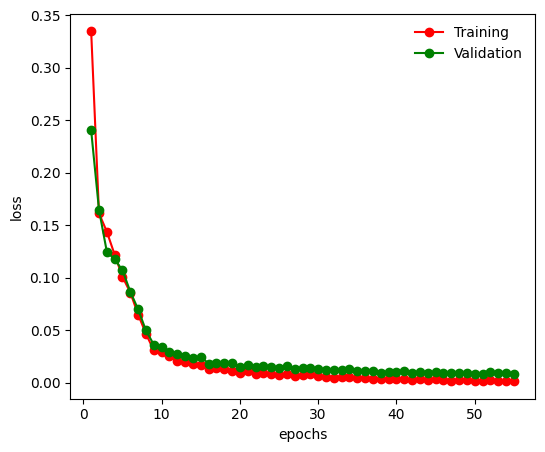

In [7]:
import torch
import subprocess
from pathlib import Path
import matplotlib.pyplot as plt

def getGitRoot():
    return subprocess.Popen(['git', 'rev-parse', '--show-toplevel'], stdout=subprocess.PIPE).communicate()[0].rstrip().decode('utf-8')

base_dir = Path(getGitRoot()) / 'gnn_e3nn' / 'e3nn_scripts' / 'models'
# load pre-trained model and plot its training history
run_name = 'submission_1_model_dict' + '.torch'

history = torch.load(base_dir / run_name, map_location='cpu')['history']

for i in history:
    print(i['train']['loss'], i['valid']['loss'])

steps = [d['step'] + 1 for d in history]
loss_train = [d['train']['loss'] for d in history]
loss_valid = [d['valid']['loss'] for d in history]

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(steps, loss_train, 'o-', label="Training", color='r')
ax.plot(steps, loss_valid, 'o-', label="Validation", color='g')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.legend(frameon=False)